<a href="https://colab.research.google.com/github/sharmavickram/AI_ML/blob/main/LSTM_Character_level_text_generation_using_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Long Short-Term Memory(LSTM)**

**Introduction**

Long Short-Term Memory Networks or LSTM in deep learning, is a sequential neural network that allows information to persist. It is a special type of Recurrent Neural Network which is capable of handling the vanishing gradient problem faced by RNN. LSTM was designed by Hochreiter and Schmidhuber that resolves the problem caused by traditional rnns and machine learning algorithms. LSTM Model can be implemented in Python using the Keras library.

**What is LSTM?**

LSTM (Long Short-Term Memory) is a recurrent neural network (RNN) architecture widely used in Deep Learning. It excels at capturing long-term dependencies, making it ideal for sequence prediction tasks.

Unlike traditional neural networks, LSTM incorporates feedback connections, allowing it to process entire sequences of data, not just individual data points. This makes it highly effective in understanding and predicting patterns in sequential data like time series, text, and speech.

LSTM has become a powerful tool in artificial intelligence and deep learning, enabling breakthroughs in various fields by uncovering valuable insights from sequential data.

**LSTM Architecture**

In the introduction to long short-term memory, we learned that it resolves the vanishing gradient problem faced by RNN, so now, in this section, we will see how it resolves this problem by learning the architecture of the LSTM. At a high level, LSTM works very much like an RNN cell. Here is the internal functioning of the LSTM network. The LSTM network architecture consists of three parts, as shown in the image below, and each part performs an individual function.

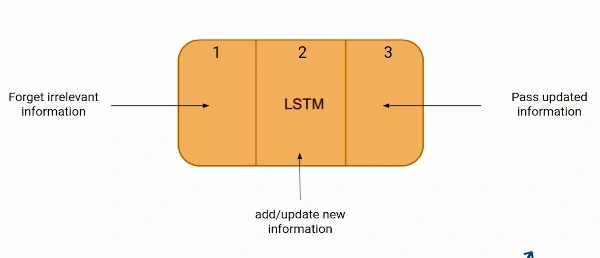

# **Logic Behind LSTM**

 This one cycle of LSTM is considered a single-time step.

These three parts of an LSTM unit are known as gates. They control the flow of information in and out of the memory cell or lstm cell. The first gate is called Forget gate, the second gate is known as the Input gate, and the last one is the Output gate. An LSTM unit that consists of these three gates and a memory cell or lstm cell can be considered as a layer of neurons in traditional feedforward neural network, with each neuron having a hidden layer and a current state.

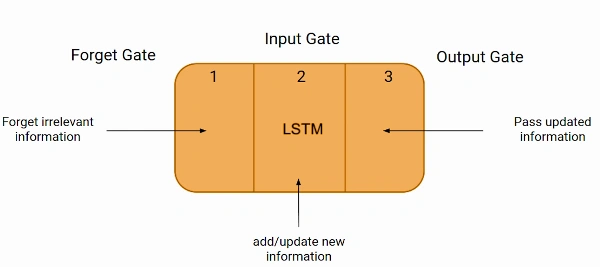

Just like a simple RNN, an LSTM also has a hidden state where H(t-1) represents the hidden state of the previous timestamp and Ht is the hidden state of the current timestamp. In addition to that, LSTM also has a cell state represented by C(t-1) and C(t) for the previous and current timestamps, respectively.

Here the hidden state is known as Short term memory, and the cell state is known as Long term memory. Refer to the following image.

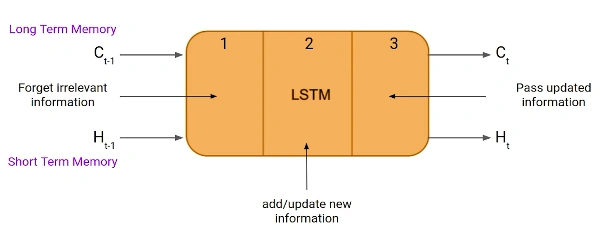

# **Applications of LSTM**

Long Short-Term Memory (LSTM) is a highly effective Recurrent Neural Network (RNN) that has been utilized in various applications. Here are a few well-known LSTM applications:

* **Language Simulation**: Language support vector machines (LSTMs) have been
utilized for natural language processing tasks such as machine translation, language modeling, and text summarization. By understanding the relationships between words in a sentence, they can be trained to construct meaningful and grammatically correct sentences.
*  **Voice Recognition**: LSTMs have been utilized for speech recognition tasks such as speech-to-text-to-text-transcription and command recognition. They may be taught to recognize patterns in speech and match them to the appropriate text.
*  **Sentiment Analysis**: LSTMs can be used to classify text sentiment as positive, negative, or neutral by learning the relationships between words and their associated sentiments.
*  **Time Series Prediction**: LSTMs can be used to predict future values in a time series by learning the relationships between past values and future values.
*  **Video Analysis**: LSTMs can be used to analyze video by learning the relationships between frames and their associated actions, objects, and scenes.
*  **Handwriting Recognition**: LSTMs can be used to recognize handwriting by learning the relationships between images of handwriting and the corresponding text.

# **Implementation**

To implement a character-level language model using LSTM cells, we’ll walk through the steps needed to create a simple model in Python using popular libraries like TensorFlow or PyTorch. This model will predict the next character given a sequence of characters from a provided text dataset.

 Let's adapt the code for a simple example where the training sequence consists of the word "hello", and the vocabulary is limited to the characters ['h', 'e', 'l', 'o']. We will train a character-level model to predict the next character based on a given input sequence from the dataset.

# **LSTM: Character-level text generation using Pytorch**

**Step-by-Step Implementation**

**1. Data Preparation Module**

This part of the code remains mostly the same except that we’ll be using PyTorch tensors instead of Numpy arrays for the data.

In [1]:
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset

# Data Preprocessing: Convert text into sequences
class TextDataset(Dataset):
    def __init__(self, text, maxlen=3, step=1):
        chars = sorted(list(set(text)))
        self.char_indices = {c: i for i, c in enumerate(chars)}
        self.indices_char = {i: c for i, c in enumerate(chars)}
        self.vocab_size = len(chars)

        self.sentences = []
        self.next_chars = []

        for i in range(0, len(text) - maxlen, step):
            self.sentences.append(text[i:i + maxlen])
            self.next_chars.append(text[i + maxlen])

        # One-hot encode the input sequences and next characters
        self.x = torch.zeros(len(self.sentences), maxlen, self.vocab_size)
        self.y = torch.zeros(len(self.sentences), self.vocab_size)

        for i, sentence in enumerate(self.sentences):
            for t, char in enumerate(sentence):
                self.x[i, t, self.char_indices[char]] = 1
            self.y[i, self.char_indices[self.next_chars[i]]] = 1

    def __len__(self):
        return len(self.sentences)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]


**2. Model Building Module**

Now, let's build the same LSTM model in PyTorch.

In [2]:
import torch.nn as nn

# Build the character-level RNN model using PyTorch
class CharRNN(nn.Module):
    def __init__(self, vocab_size, hidden_size=128, seq_length=3):
        super(CharRNN, self).__init__()
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        self.lstm = nn.LSTM(input_size=vocab_size, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, vocab_size)

    def forward(self, x):
        # Initial hidden and cell states
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # Get the output of the last LSTM step
        return out


**3. Training Module**

Now let's write the training loop for the model using PyTorch.

In [3]:
import torch.optim as optim
import random
import torch.nn.functional as F

# Function to train the model
# Function to train the model
def train_model(model, dataset, epochs=10, batch_size=128, lr=0.01, device=torch.device('cpu')):
    train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    optimizer = optim.RMSprop(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        total_loss = 0

        for x_batch, y_batch in train_loader:
            # Move the batch data to the appropriate device
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)

            optimizer.zero_grad()
            # Forward pass
            output = model(x_batch)
            loss = criterion(output, torch.argmax(y_batch, dim=1))  # CrossEntropyLoss expects class indices
            total_loss += loss.item()

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss / len(train_loader)}")


**4. Text Generation Module**

We need to adapt the text generation process to use PyTorch. Below is the function for generating text based on a trained model.

In [4]:
# Sampling function (same as in Keras version)
def sample(preds, temperature=1.0):
    # Ensure preds is a numpy array
    preds = np.asarray(preds).astype("float64")

    # Apply temperature scaling
    if temperature <= 0:
        temperature = 1.0  # Avoid divide by zero or negative temperatures

    # Log-sum-exp trick for numerical stability
    # To avoid overflow issues with large numbers, we subtract the max value before applying exp
    preds = np.log(preds + 1e-7) / temperature  # Add a small epsilon to avoid log(0)
    exp_preds = np.exp(preds - np.max(preds))  # Subtract max value for numerical stability
    preds = exp_preds / np.sum(exp_preds)  # Normalize to get a valid probability distribution

    # Ensure the probabilities are valid (between 0 and 1, and sum to 1)
    if np.any(np.isnan(preds)) or np.any(preds < 0) or np.any(preds > 1) or np.abs(np.sum(preds) - 1) > 1e-5:
        #print("Warning: Invalid probabilities detected, adjusting to uniform distribution.")
        preds = np.ones_like(preds) / len(preds)  # Fallback to uniform distribution if NaN or invalid

    # Sample from the probability distribution using np.random.multinomial
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

# Text generation function
def generate_text(model, start_index, maxlen, char_indices, indices_char, text, diversity=1.0, num_generate=400, device='cpu'):
    model.eval()
    generated = ""
    sentence = text[start_index:start_index + maxlen]

    for i in range(num_generate):
        x_pred = torch.zeros(1, maxlen, len(char_indices), device=device)
        for t, char in enumerate(sentence):
            x_pred[0, t, char_indices[char]] = 1.0

        # Forward pass through the model
        with torch.no_grad():
            preds = model(x_pred)

        # Convert predictions to numpy for sampling
        preds = preds.cpu().numpy()[0]

        # Sample the next character using the adjusted temperature
        next_index = sample(preds, diversity)
        next_char = indices_char[next_index]

        # Append the generated character to the output and shift the window
        generated += next_char
        sentence = sentence[1:] + next_char

    return generated



**5. Main Execution**

Finally, we tie everything together in the main.py file.

In [5]:
# Main execution
if __name__ == "__main__":
    # Check for GPU availability
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    text = "hello " * 100  # Simple dataset with "hello" repeated

    # Prepare data
    dataset = TextDataset(text, maxlen=3, step=1)

    # Create model and move to the device (GPU or CPU)
    model = CharRNN(vocab_size=dataset.vocab_size, hidden_size=128, seq_length=3).to(device)

    # Train model
    train_model(model, dataset, epochs=10, batch_size=128, lr=0.01, device=device)

    # Generate text after training
    start_index = random.randint(0, len(text) - 3 - 1)
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print(f"Generating text with diversity: {diversity}")
        generated = generate_text(model, start_index, 3, dataset.char_indices, dataset.indices_char, text, diversity, device=device)
        print(f"Generated text: {generated}")


Epoch 1/10, Loss: 2.3870806217193605
Epoch 2/10, Loss: 0.7228686928749084
Epoch 3/10, Loss: 0.17662216424942018
Epoch 4/10, Loss: 0.020177854970097543
Epoch 5/10, Loss: 0.011173721589148044
Epoch 6/10, Loss: 0.007478195615112782
Epoch 7/10, Loss: 0.005488364864140749
Epoch 8/10, Loss: 0.0042659415863454345
Epoch 9/10, Loss: 0.0034542863722890615
Epoch 10/10, Loss: 0.0028560318052768706
Generating text with diversity: 0.2


<ipython-input-4-029a7577e803>:12: RuntimeWarning: invalid value encountered in log
  preds = np.log(preds + 1e-7) / temperature  # Add a small epsilon to avoid log(0)


Generated text: o olo h lohloll  lohh ollholeh elo he h   lohohle oee  eoe h hhhe eol   l   lohlheehl loo loehhohlohllel  hhe lo  e h  h oeholooehhlheeohel   llholehel loehooolll lehee oheoe ee    lolhelohhoh o lhlleol lheeoloee oo oll oelehelehhe lo heo  e eoeoeollh eoe lllhheeeehheel ohll l  hoolhll  hlelheeee oel hhhhel lhlolloheloolh h eoelhooe h e oello  e o l eoelo he l elo h eohe lo  e lolheleell o l   hol
Generating text with diversity: 0.5
Generated text: hhellloooh hloeoo  ol e lh o ollll  o  hleo lehl elho o olhloo e ohl lo  ohhee ee ol le   oell e le hhllhleee l hellohe lh  hheee h  hlle l  e loe e oo ele ehhehlholhohooooohlhh o eoohllhooloho lllhhhh leoeeel oooeoo leelohh eh le l eeeeel oholehlhe eelo oh eh lhlo h oell e ehlllelolh hlh loh  oo llhleleee  hhleoel   o eh olho eohelh e oolee lo o oleh loh lohe ehhhlhhhlohllollel loolllhohehoolhoho
Generating text with diversity: 1.0
Generated text:  eh he hllh ohllooo h  lleloeoll hoeee   l  loeehlh e leolhleoh elhlohl e  eee